In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

We have 1338 rows and 7 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No Null values. Our work gets easier.

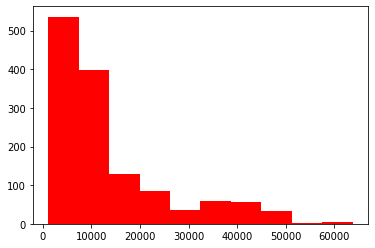

In [8]:
plt.hist(df.charges,color='Red')
plt.show()

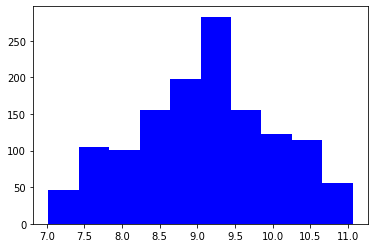

In [9]:
target = np.log(df.charges)
plt.hist(target,color='blue')
plt.show()

In [10]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.dtypes

age           int64
bmi         float64
children      int64
charges     float64
dtype: object

These are our numerical values.

In [11]:
categorical = df.select_dtypes(exclude=[np.number])
categorical.dtypes

sex       object
smoker    object
region    object
dtype: object

We need to encode this values before training our model.

In [12]:
corr = numerical_features.corr()
print(corr['charges'].sort_values(ascending=False)[:5],'\n')

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64 



Here we can see correlation of our numerical features with our target variable charges. But this is still half picture, wee need to consider categorical features as well but before that we need to encode them.

In [13]:
df['enc_sex']=pd.get_dummies(df.sex,drop_first=True)



In [14]:
df.replace({"smoker":{"no":0,"yes":1}}, inplace = True)

In [15]:
df.replace({"region":{"southeast":0,"southwest":1,"northeast":2,"northwest":3}}, inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
 7   enc_sex   1338 non-null   uint8  
dtypes: float64(2), int64(4), object(1), uint8(1)
memory usage: 74.6+ KB


In [17]:
data= df.select_dtypes(include=[np.number])


In [18]:
y = np.log(df.charges)
x = data.drop(['charges'],axis=1)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [20]:
from sklearn.linear_model import LinearRegression
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(x_train,y_train)
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(x_test, y_test))
print('Linear Regression Coef is : ' , LinearRegressionModel.coef_)
print('Linear Regression intercept is : ' , LinearRegressionModel.intercept_)

Linear Regression Test Score is :  0.7935624527564021
Linear Regression Coef is :  [ 0.03383234  0.01182523  0.1052668   1.5382697   0.03520211 -0.07242735]
Linear Regression intercept is :  6.971788167596159


In [21]:
y_pred = LinearRegressionModel.predict(x_test)
print('Y predict: ',y_pred[:5])
print('Y test: ', y_test[:5])

Y predict:  [8.02988136 9.25571748 9.09131033 7.96091664 9.03256952]
Y test:  17      7.781210
1091    9.331366
273     9.171357
270     7.449752
874     9.092810
Name: charges, dtype: float64


In [22]:
from sklearn.metrics import mean_squared_error
print('root square error is',LinearRegressionModel.score(x_test, y_test))
predictions=LinearRegressionModel.predict(x_test)

print('RMSE', mean_squared_error(y_test, predictions))


root square error is 0.7935624527564021
RMSE 0.1959857834255303


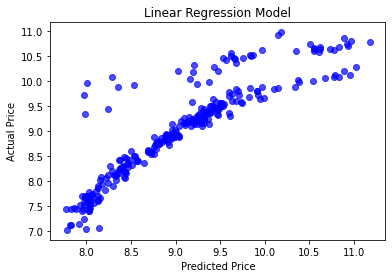

In [23]:
actual_values=y_test
plt.scatter(predictions, actual_values,alpha=.7, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

plt.show()

In [24]:
#This is a people from our data, thats a tuple, we want to change it to numpy array
input = (31,0,36.3,2,1,1) 

# Changing the tuple to numpy array
input_numpy = np.asarray(input)

# reshaping this array
input_numpy_reshaped = input_numpy.reshape(1,-1)

In [25]:
prediction = LinearRegressionModel.predict(input_numpy_reshaped)
print("The ACTUAL Medical Insurance Cost with is :","38711", "USD")
print("The Estimated Medical Insurance Cost with Linear Regression is :", prediction[0], "USD")

The ACTUAL Medical Insurance Cost with is : 38711 USD
The Estimated Medical Insurance Cost with Linear Regression is : 14.881089781853754 USD


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
